<br/><br/><br/><br/>
<h1> 실습 문제 </h1>


###  다음과 같은 [그림 5] 의 그래프에 대해서 아래 질문들에 답하시오.

![Exercise](img/fig5.png)

###  실습 1. 
####  [그림 5] 의 그래프에 대해,  ' adjacency list' 표현의 파이썬 코드를 구하시오.


#### 상기 [그림 5] 의 그래프에 대해, ' adjacency list' 표현의 파이썬 코드는 다음과 같습니다.

In [1]:
weight_adjacency_list = {
             'A': [['B', 2], ['F', 7], ['G', 3]],
             'B': [['A', 2],['C', 4], ['G', 6]],
             'C': [['B', 4], ['D', 2],['H', 2]],         
             'D': [['C', 2], ['E', 1],['H', 8]],
             'E': [['D', 1], ['F', 6],['I', 2]],             
             'F': [['A', 7], ['E', 6],['I', 5]],
             'G': [['A', 3], ['B', 6],['H', 3], ['I', 1]] ,
             'H': [['C', 2], ['D', 8],['G', 3], ['I', 4]],
             'I': [['E', 2], ['F', 5],['G', 1], ['H', 4]] 
    
}

###  실습 2(a). 
####   'weighted  adjacency list'  파이썬 표현으로부터,  'weighted adjacency matrix'  표현을 구할 수있는  파이썬 함수를 코딩하여 보시오. (node 순서는  알파벳 올림차순 임(즉,  A,  B, C, D, E, F, G, H, I.)

In [2]:
def Adj_Mat_W(adjL):  
    n=len(adjL)
    nodes =list()    
    for key in adjL:
        nodes.append(key)
   
    adM= [[] for _ in range(n)]    
    
    k=0
    j=0    
    for node in nodes:        
        if adjL[node]:
            for s in adjL[node]:
                i=0
               # print("node={}, str={}".format(node,s))
                while(i < n):                   
                    if i>=j:                       
                        if s[0] == nodes[i]:
                            adM[k].append(s[1])
                            j=i+1           
                            i=n
                        else:
                            adM[k].append(0)  
                            i+=1
                    else:
                        i+=1
            if j< n: 
                for _ in range(j, n):
                    adM[k].append(0)  
            
        else:
            for _ in range(n):
                adM[k].append(0)
        k+=1
        j=0
    return adM    

###  실습 2(b)
#### 실습 2(a)에서 구한 함수를 이용하여, 실습1  의 [그림 5] 의 그래프에 대한  ' adjacency list'  파이썬 표현으로부터,  'weighted adjacency matrix'  을 구하여 보시오. 

In [3]:
Adj_Mat_W(weight_adjacency_list)

[[0, 2, 0, 0, 0, 7, 3, 0, 0],
 [2, 0, 4, 0, 0, 0, 6, 0, 0],
 [0, 4, 0, 2, 0, 0, 0, 2, 0],
 [0, 0, 2, 0, 1, 0, 0, 8, 0],
 [0, 0, 0, 1, 0, 6, 0, 0, 2],
 [7, 0, 0, 0, 6, 0, 0, 0, 5],
 [3, 6, 0, 0, 0, 0, 0, 3, 1],
 [0, 0, 2, 8, 0, 0, 3, 0, 4],
 [0, 0, 0, 0, 2, 5, 1, 4, 0]]

### 실습 3.
#### "networkx'  파이썬 패키지를 사용하여 [그림 5]의 그래프를 그려 보시오. 단, 아래 pos 변수를 이용하여 출력 예시와  반드시 동일하게 출력해야 합니다.

In [4]:
# 그래프 위치에 관한 dictionary. 
# https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html
A,B,C,D,E,F,G,H,I = 'ABCDEFGHI'
pos = {A:(1, 2),B:(3, 2),C:(4, 1),D:(3, 0),E:(1, 0),F:(0, 1),G:(2, 1.5),H:(3, 1),I:(1, 1)}

<출력 예시>

![Altext](img/prob0.png)

<br/>※ 풀이조건
<ol>
    <li>그래프를 그릴 때 크기 및 색상은 자유롭게 하되, 각 노드 및 엣지를 '알아볼 수 있도록' 그린다.</li>
</ol>
<br/> ※ 제한조건
<ol>
    <li>pos 변수를 사용하여 각 노드 및 엣지의 위치는 위 출력 예시와 동일하게 출력되어야 한다. 안 되었을 시 0.5점 감점한다.</li>
</ol>


In [5]:
import networkx as nx
from matplotlib import pyplot as plt

In [6]:
def draw_graph(graph, pos=None) :
    if pos == None : pos=nx.spring_layout(graph)
    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(graph, pos=pos, node_size=2000, node_color='cyan')
    nx.draw_networkx_edges(graph, pos=pos)
    nx.draw_networkx_labels(graph, pos=pos, font_size=30)
    edge_labels = {(u, v): d['weight'] for u, v, d in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=edge_labels, font_size=20, rotate=False)
    plt.show()

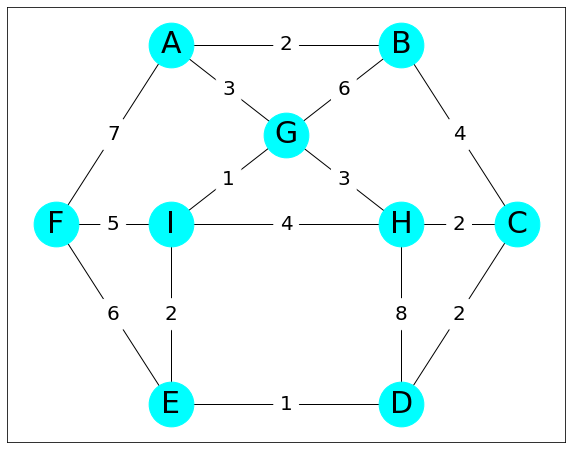

In [7]:
A,B,C,D,E,F,G,H,I = 'ABCDEFGHI'
graph=nx.Graph()
nodes=[A,B,C,D,E,F,G,H,I]
edges=[(A, B, 2), (A, G, 3), (A, F, 7), (B, C, 4), (B, G, 6), (C, D, 2), (C, H, 2), 
       (D, E, 1), (D, H, 8), (E, F, 6), (E, I, 2), (F, I, 5), (G, I, 1), (G, H, 3), (H, I, 4)]


graph.add_nodes_from(nodes)
graph.add_weighted_edges_from(edges)

draw_graph(graph, pos)

#### 실습  4.
#### "networkx' 파이썬 패키지를 사용하여 위에서 그린 그래프에서 노드 F 에서 노드 B, C, D, H, G 까지의 최단 경로와 최단 거리를 각각 구하여 출력하시오. 단, 아래 출력 예시에 맞게 출력해야 합니다.

<출력 예시>
<br/>노드 F에서 노드 E까지 최단 경로는 ['F', 'E'] 이며 최단 거리는 6 이다.

※ 풀이조건
<ol>
    <li>"networkx' 파이썬 패키지 내 함수 및 클래스를 사용하여 시작 노드를 F로, 도착 노드를 B, C, D, H, G 중 하나씩 설정해서 총 5개의 최단 경로와 최단 거리를 구하여 출력한다. (예: (F-B), (F-C), (F-D), (F-H), (F-G) 로, 총 5개)</li>
    <li>최단 경로가 2개 이상일 경우 아무 것이나 1개를 택하여 출력한다.</li>
</ol>
<br/> ※ 제한조건
<ol>
    <li>5개 경로 및 거리가 모두 올바른 값이면 정답 처리 한다.</li>
    <li>다른 패키지 함수를 이용하여 간단히 구현해도 정답처리한다. 단 실습 3의 답과 동일하게 구현하면 0점 처리한다.</li>
</ol>


In [8]:
import networkx as nx

src = 'F'
dst = 'BCDHG'
for d in dst :
    print('노드 '+src+'에서 노드 '+d+'까지 최단 경로는',
          nx.shortest_path(graph, src, d, "weight"),
          '이며 최단 거리는',
          nx.shortest_path_length(graph, src, d, "weight"),
          '이다')

노드 F에서 노드 B까지 최단 경로는 ['F', 'A', 'B'] 이며 최단 거리는 9 이다
노드 F에서 노드 C까지 최단 경로는 ['F', 'E', 'D', 'C'] 이며 최단 거리는 9 이다
노드 F에서 노드 D까지 최단 경로는 ['F', 'E', 'D'] 이며 최단 거리는 7 이다
노드 F에서 노드 H까지 최단 경로는 ['F', 'I', 'H'] 이며 최단 거리는 9 이다
노드 F에서 노드 G까지 최단 경로는 ['F', 'I', 'G'] 이며 최단 거리는 6 이다
